In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os.path

# File Paths

In [4]:
folder = "C:\\Users\\Florian\\Box Sync\\Projects\\"
project = "Mn3Ge\\magnetization\\112519"

files = [i for i in os.listdir(folder+project) if i[-3:] == 'DAT']
files

['MN3GE_112519_MVH_300K.DAT',
 'Mn3Ge_112519_MvH_395K.DAT',
 'MN3GE_112519_MVT_0.1T_FC.DAT',
 'MN3GE_112519_MVT_0T_FC.DAT']

# Material Specifics and Constants

In [5]:
mass = 55.63e-3 # in g
# molar masses in g/mol
Mn = 54.938043
Ge = 72.630
Mn3Ge_molarmass = 3*Mn + Ge

# Bohr magneton in erg/G
muB = 9.274009994e-21
# Avogadro number
NA = 6.02214076e23 #per mol

# Data import

In [8]:
filename = files[2]
data = []
N_headers = 31

f = open(folder+project+"\\"+filename, 'r')
for i in np.arange(N_headers):
    f.readline()
    
for line in f:
    line=line.strip()
    line=line.split(",")
    line=line[1:6]
        
    if np.any(np.array(line) == '' )==False:
        for i in np.arange(len(line)):
            line[i] = float(line[i])
        data.append(line)
        
#    try:
#        for i in np.arange(len(line)):
#            line[i] = float(line[i])
#    except np.any(line == '' ) == True:
#        continue
    
#    data.append(line)
    
data = np.array(data)

time = data[:,0]
temp = data[:, 1]
field = data[:, 2]/10000 #in Tesla
moment = data[:, 3] / mass * Mn3Ge_molarmass #in erg/(G mol)
stderr = data[:, 4]

# M v T

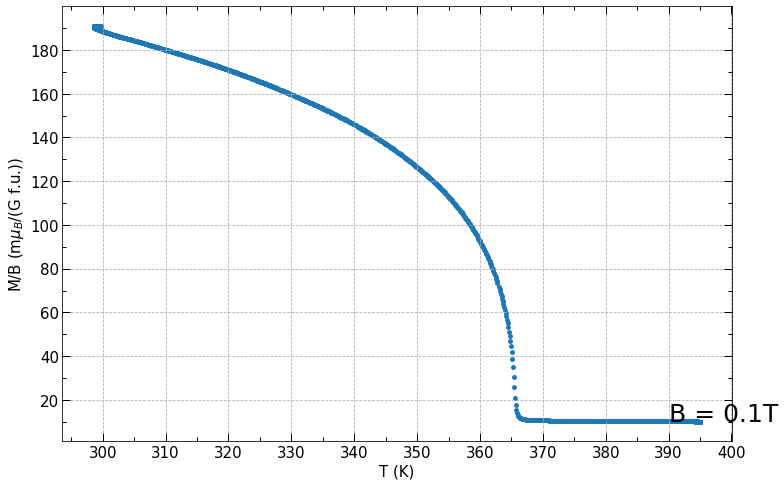

In [9]:
Xi = moment / .1 / muB / NA * 1000 # in 10^(-3) mu_B/(G f.u.)

fig, axes = plt.subplots(1, 1, figsize=(12,8))

axes.set_xlabel('T (K)', fontsize=15)
axes.set_ylabel('M/B (m$\mu_B$/(G f.u.))', fontsize=15)

axes.set_ylim([min(Xi) - 0.05*(max(Xi)-min(Xi)), max(Xi) + 0.05*(max(Xi)-min(Xi))])
axes.set_xlim([min(temp)-5, max(temp)+5])
#minx = 366
#maxx = 395.5
#mask = [np.all([i<maxx, i>minx]) for i in temp]
#axes.set_xlim([minx, maxx])
#axes.set_ylim([min(Xi[mask]) - 0.05*(max(Xi[mask])-min(Xi[mask])), max(Xi[mask]) + 0.05*(max(Xi[mask])-min(Xi[mask]))])

axes.xaxis.set_major_locator(plt.MultipleLocator(10))
axes.xaxis.set_minor_locator(plt.MultipleLocator(5))
axes.yaxis.set_major_locator(plt.MaxNLocator(10))
axes.yaxis.set_minor_locator(plt.MaxNLocator(20))

axes.tick_params(axis="both",direction="in", labelsize=15, bottom='True', top='True', left='True', right='True', 
                length=8, width=1, which = 'major')
axes.tick_params(axis="both",direction="in", bottom='True', top='True', left='True', right='True', 
                length=4, width=1, which = 'minor')

axes.grid(True, linestyle='--')

text = filename[filename.find('T_')+2 : filename.find('T_')+2 + filename[filename.find('T_')+2:].find('_')]
axes.text(390, 0.057*(max(Xi)-min(Xi)), 'B = '+text, fontsize=25)

axes.scatter(temp, Xi, s=15)

# M v H

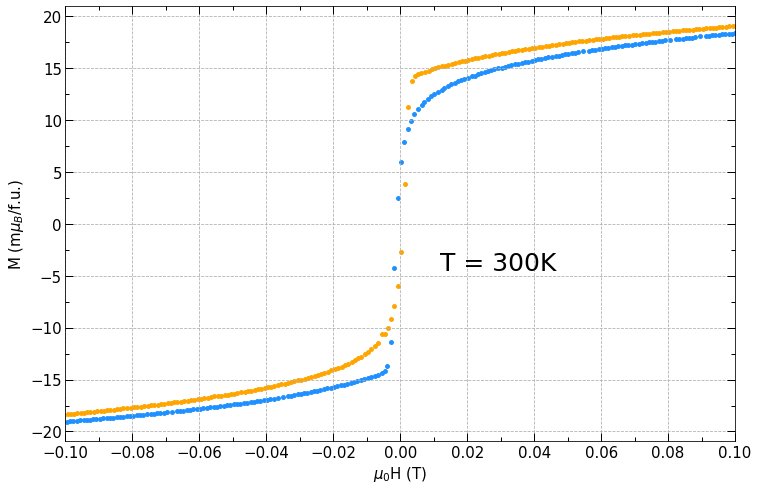

In [41]:
m = moment / muB / NA * 1000 # in 10^(-3) * mu_B/f.u.
fig, axes = plt.subplots(1, 1, figsize=(12,8))

axes.set_xlabel('$\mu_0$H (T)', fontsize=15)
axes.set_ylabel('M (m$\mu_B$/f.u.)', fontsize=15)

axes.set_ylim([min(m) - 0.05*(max(m)-min(m)), max(m) + 0.05*(max(m)-min(m))])
axes.set_xlim([min(field)-0.05, max(field)+0.05])
minx = -.1
maxx = .1
mask = [np.all([i<maxx, i>minx]) for i in field]
axes.set_xlim([minx, maxx])
axes.set_ylim([min(m[mask]) - 0.05*(max(m[mask])-min(m[mask])), max(m[mask]) + 0.05*(max(m[mask])-min(m[mask]))])



axes.xaxis.set_major_locator(plt.MaxNLocator(10))
axes.xaxis.set_minor_locator(plt.MaxNLocator(20))
axes.yaxis.set_major_locator(plt.MaxNLocator(10))
axes.yaxis.set_minor_locator(plt.MaxNLocator(20))

axes.tick_params(axis="both",direction="in", labelsize=15, bottom='True', top='True', left='True', right='True', 
                length=8, width=1, which = 'major')
axes.tick_params(axis="both",direction="in", bottom='True', top='True', left='True', right='True', 
                length=4, width=1, which = 'minor')

axes.grid(True, linestyle='--')

text = filename[filename.find('H_')+2 : filename.find('K.')+1]
axes.text(0.012, -0.05*(max(m)-min(m)), 'T = '+text, fontsize=25)


index = np.where(abs(field - min(field))<1e-10)[0][0]
y1 = m[:index]
x1 = field[:index]
y2 = m[index:]
x2 = field[index:]


axes.scatter(x1, y1, s=15, c = 'orange')
axes.scatter(x2, y2, s=15, c = 'dodgerblue')